<a href="https://colab.research.google.com/github/KatyaKatyaKatyaSSS/DKR-1/blob/main/%D0%9B%D0%B0%D0%B13_%D0%A1%D0%BE%D0%B7%D0%B8%D0%BD%D0%B0%2C402_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Лабораторная работа №3
## Числовые характеристики выборки

ИСПк-402 Князева Эвелина

**Задание**
1. Изучить теоретический материал (*см. вложенный pdf файл, стр 6 - 7*)
2. Найти в открытых источниках, или выдумать выборку непрерывных данных. Можно использовать данные из приложенного csv файла. (Описание данных: https://www.kaggle.com/datasets/spscientist/students-performance-in-exams?resource=download)
3. Реализовать скрипт в Python для загрузки данных (соответствующие команды найти самостоятельно). Вариант использования команд из библиотеки `numpy` для загрузки данных из примера см. ниже.
4. Посчитать и вывести основные числовые характеристики выборки (среднее, дисперсию, стандартное отклонение, медиану).
5. Провести графический анализ данных. Построить несколько графиков: гистограмма, точечный, ящичковая диаграмма и т.п. по нескольким полям данных. Сделать предположение о законах распределения исследуемых данных.

# Загрузка файла

In [1]:
from google.colab import files

uploaded = files.upload()


Saving StudentsPerformance.csv to StudentsPerformance.csv


# Загрузка данных

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

file_path = 'StudentsPerformance.csv'
data = pd.read_csv(file_path, header=None)
data.columns = ['gender', 'group', 'parental_education', 'lunch', 'test_prep', 'math score', 'reading score', 'writing score']

data.head()

,gender,group,parental_education,lunch,test_prep,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


Выбор непрерывных переменных

In [3]:
continuous_columns = ['math score', 'reading score', 'writing score']

# Вычисление среднего значения

In [5]:
mean_values = data[continuous_columns].mean()
print("Среднее значение:\n", mean_values)

Среднее значение:
 math score       66.089
reading score    69.169
writing score    68.054
dtype: float64


# Вычисление дисперсии

In [9]:
variance_values = data[continuous_columns].var()
print("\nДисперсия:\n", variance_values)


Дисперсия:
 math score       229.918998
reading score    213.165605
writing score    230.907992
dtype: float64


# Вычисление стандартного отклонения

In [11]:
std_dev_values = data[continuous_columns].std()
print("\nСтандартное отклонение:\n", std_dev_values)


Стандартное отклонение:
 math score       15.163080
reading score    14.600192
writing score    15.195657
dtype: float64


# Вычисление медианы

In [12]:
median_values = data[continuous_columns].median()
print("\nМедиана:\n", median_values)


Медиана:
 math score       66.0
reading score    70.0
writing score    69.0
dtype: float64


# Построение гистограмм

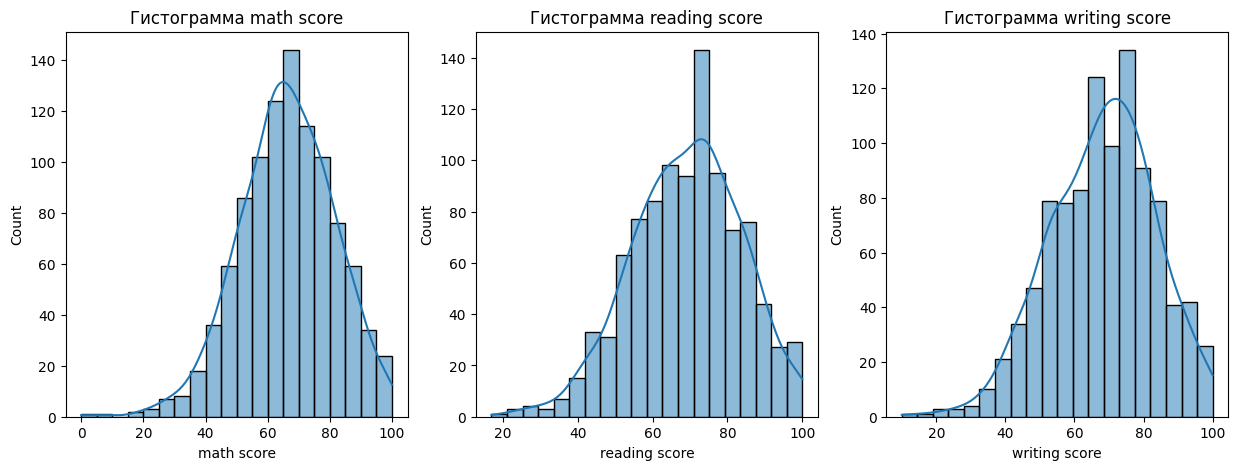

In [ ]:
plt.figure(figsize=(15, 5))
for i, column in enumerate(continuous_columns):
    plt.subplot(1, 3, i + 1)
    sns.histplot(data[column], bins=20, kde=True)
    plt.title(f'Гистограмма {column}')
plt.show()

# Построение ящичковых диаграмм

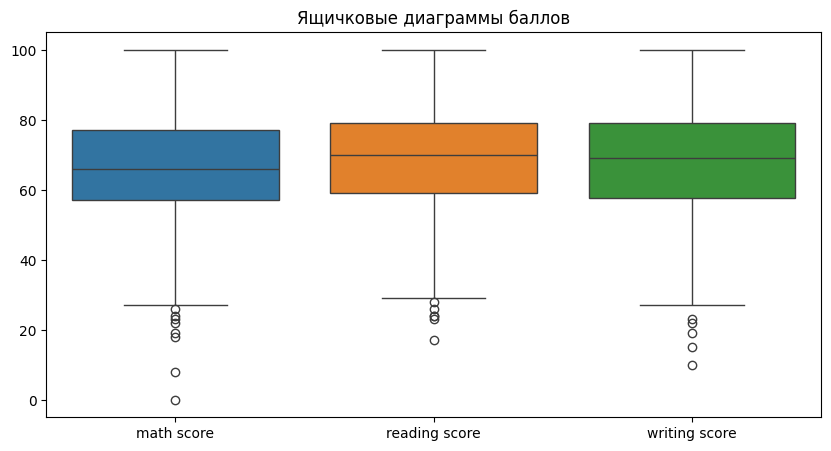

In [ ]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=data[continuous_columns])
plt.title('Ящичковые диаграммы баллов')
plt.show()

# Построение точечных диаграмм

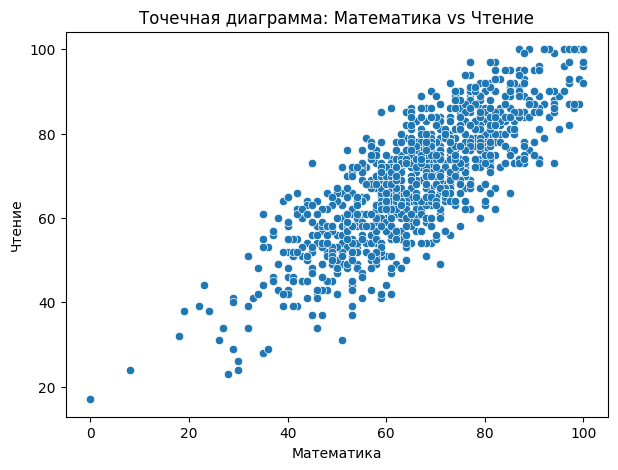

In [ ]:
plt.figure(figsize=(7, 5))
sns.scatterplot(x=data['math score'], y=data['reading score'])
plt.xlabel('Математика')
plt.ylabel('Чтение')
plt.title('Точечная диаграмма: Математика vs Чтение')
plt.show()


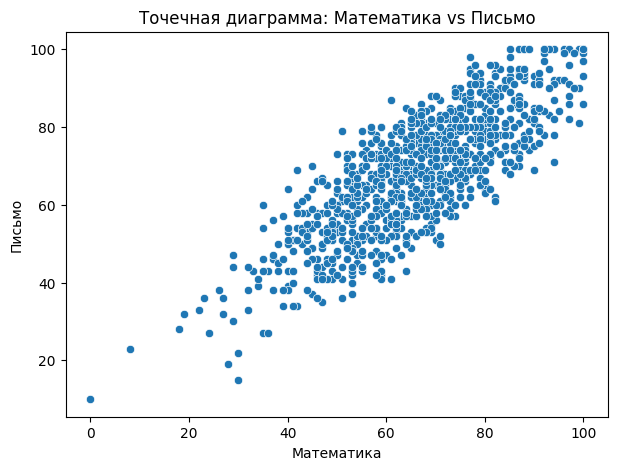

In [ ]:
plt.figure(figsize=(7, 5))
sns.scatterplot(x=data['math score'], y=data['writing score'])
plt.xlabel('Математика')
plt.ylabel('Письмо')
plt.title('Точечная диаграмма: Математика vs Письмо')
plt.show()

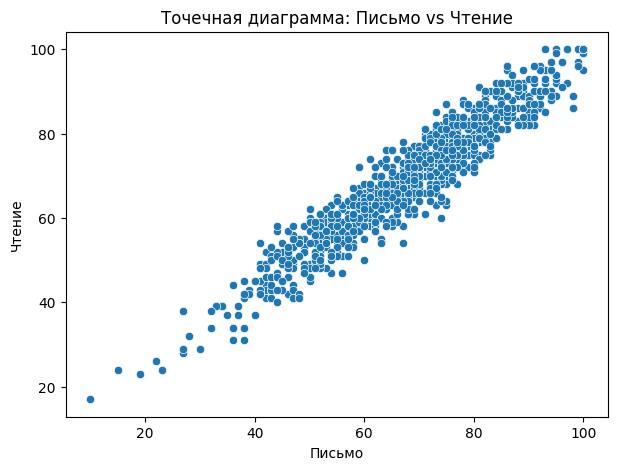

In [ ]:
plt.figure(figsize=(7, 5))
sns.scatterplot(x=data['writing score'], y=data['reading score'])
plt.xlabel('Письмо')
plt.ylabel('Чтение')
plt.title('Точечная диаграмма: Письмо vs Чтение')
plt.show()

# Построение диаграммы плотности

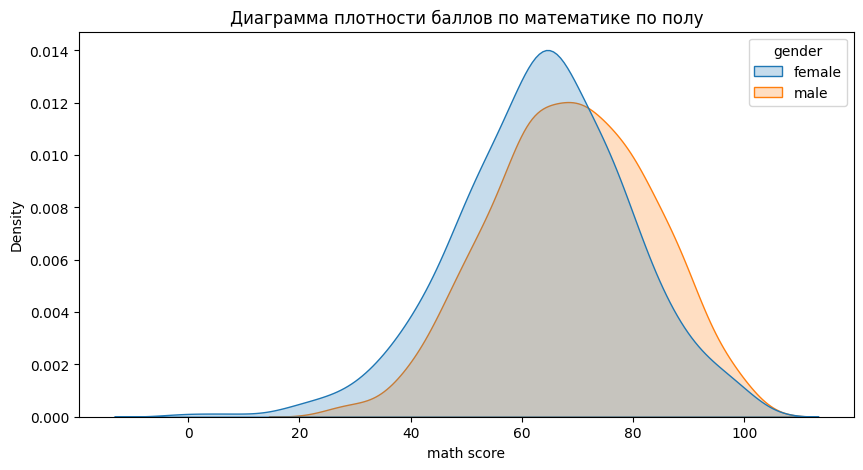

In [ ]:
plt.figure(figsize=(10, 5))
sns.kdeplot(data=data, x='math score', hue='gender', fill=True)
plt.title('Диаграмма плотности баллов по математике по полу')
plt.show()

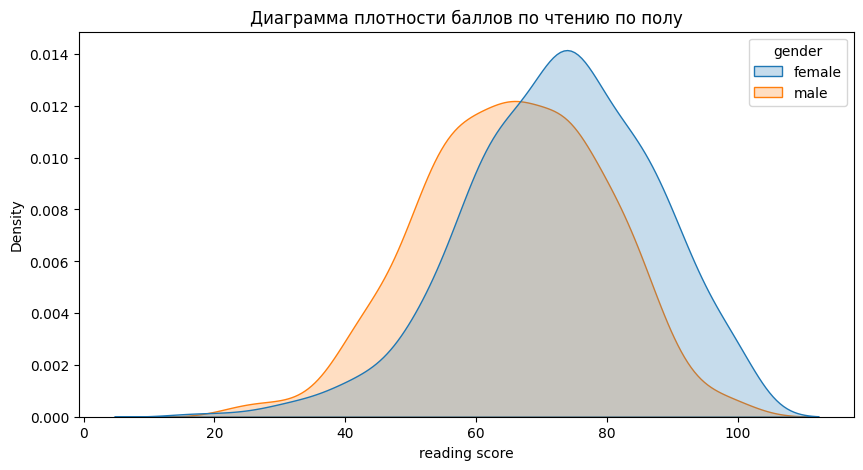

In [ ]:
plt.figure(figsize=(10, 5))
sns.kdeplot(data=data, x='reading score', hue='gender', fill=True)
plt.title('Диаграмма плотности баллов по чтению по полу')
plt.show()

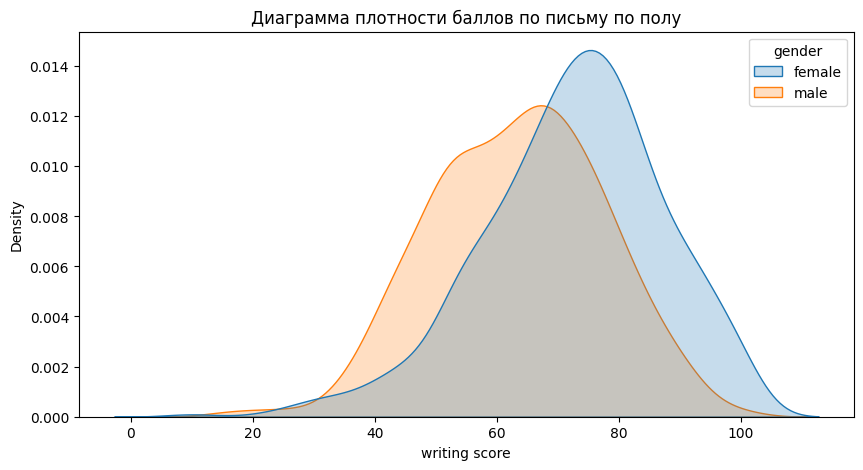

In [ ]:
plt.figure(figsize=(10, 5))
sns.kdeplot(data=data, x='writing score', hue='gender', fill=True)
plt.title('Диаграмма плотности баллов по письму по полу')
plt.show()

# Группировка данных по полу

In [ ]:
mean_by_gender = data.groupby('gender')[continuous_columns].mean()
print("\nСредние значения по полу:\n", mean_by_gender)


Средние значения по полу:
         math score  reading score  writing score
gender                                          
female   63.633205      72.608108      72.467181
male     68.728216      65.473029      63.311203


<Figure size 1000x500 with 0 Axes>

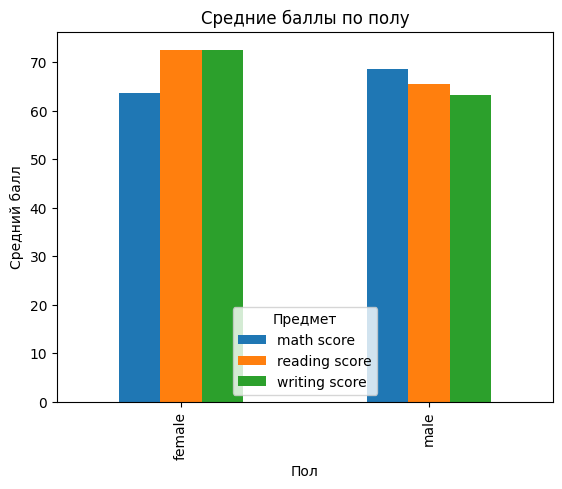

In [ ]:
plt.figure(figsize=(10, 5))
mean_by_gender.plot(kind='bar')
plt.title('Средние баллы по полу')
plt.xlabel('Пол')
plt.ylabel('Средний балл')
plt.legend(title='Предмет')
plt.show()

# Группировка данных по группе

In [18]:
mean_by_group = data.groupby('group')[continuous_columns].mean()
print("\nСредние значения по группам:\n", mean_by_group)


Средние значения по группам:
          math score  reading score  writing score
group                                            
group A   61.629213      64.674157      62.674157
group B   63.452632      67.352632      65.600000
group C   64.463950      69.103448      67.827586
group D   67.362595      70.030534      70.145038
group E   73.821429      73.028571      71.407143


<Figure size 1000x500 with 0 Axes>

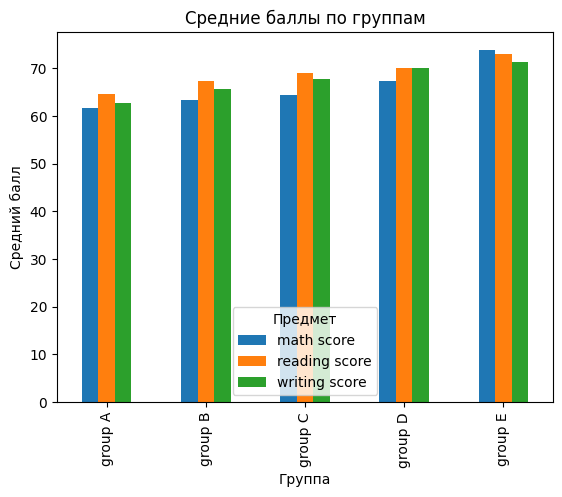

In [ ]:
plt.figure(figsize=(10, 5))
mean_by_group.plot(kind='bar')
plt.title('Средние баллы по группам')
plt.xlabel('Группа')
plt.ylabel('Средний балл')
plt.legend(title='Предмет')
plt.show()

# Влияние подготовительных курсов

In [17]:
mean_by_course = data.groupby('test_prep')[continuous_columns].mean()
print("\nСредние значения по подготовительным курсам:\n", mean_by_course)



Средние значения по подготовительным курсам:
            math score  reading score  writing score
test_prep                                          
completed   69.695531      73.893855      74.418994
none        64.077882      66.534268      64.504673


<Figure size 1000x500 with 0 Axes>

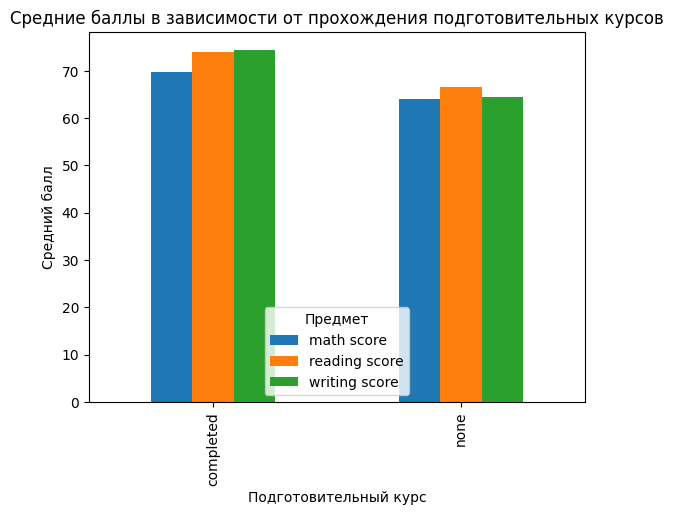

In [ ]:
plt.figure(figsize=(10, 5))
mean_by_course.plot(kind='bar')
plt.title('Средние баллы в зависимости от прохождения подготовительных курсов')
plt.xlabel('Подготовительный курс')
plt.ylabel('Средний балл')
plt.legend(title='Предмет')
plt.show()

# Влияние образования родителей

In [16]:
mean_by_parent_education = data.groupby("parental_education")[continuous_columns].mean()
print("\nСредние значения по уровню образования родителей:\n", mean_by_parent_education)


Средние значения по уровню образования родителей:
                     math score  reading score  writing score
parental_education                                          
associate's degree   67.882883      70.927928      69.896396
bachelor's degree    69.389831      73.000000      73.381356
high school          62.137755      64.704082      62.448980
master's degree      69.745763      75.372881      75.677966
some college         67.128319      69.460177      68.840708
some high school     63.497207      66.938547      64.888268


<Figure size 1000x500 with 0 Axes>

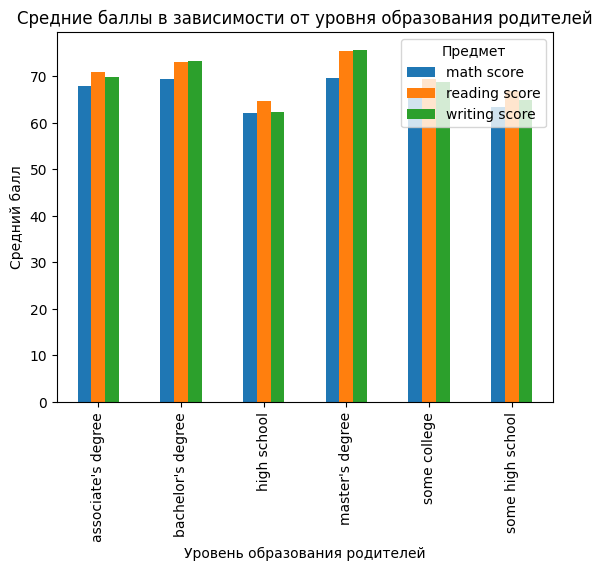

In [ ]:
plt.figure(figsize=(10, 5))
mean_by_parent_education.plot(kind='bar')
plt.title('Средние баллы в зависимости от уровня образования родителей')
plt.xlabel('Уровень образования родителей')
plt.ylabel('Средний балл')
plt.legend(title='Предмет')
plt.show()

# Анализ распределения данных

Закон распределения для math score:
     Интервалы  Среднее значение  Частота  Относительная частота
0      0.0-3.2          1.612903        1                  0.001
1      3.2-6.5          4.838710        0                  0.000
2      6.5-9.7          8.064516        1                  0.001
3     9.7-12.9         11.290323        0                  0.000
4    12.9-16.1         14.516129        0                  0.000
5    16.1-19.4         17.741935        2                  0.002
6    19.4-22.6         20.967742        1                  0.001
7    22.6-25.8         24.193548        2                  0.002
8    25.8-29.0         27.419355        7                  0.007
9    29.0-32.3         30.645161        5                  0.005
10   32.3-35.5         33.870968        8                  0.008
11   35.5-38.7         37.096774        9                  0.009
12   38.7-41.9         40.322581       20                  0.020
13   41.9-45.2         43.548387       29             

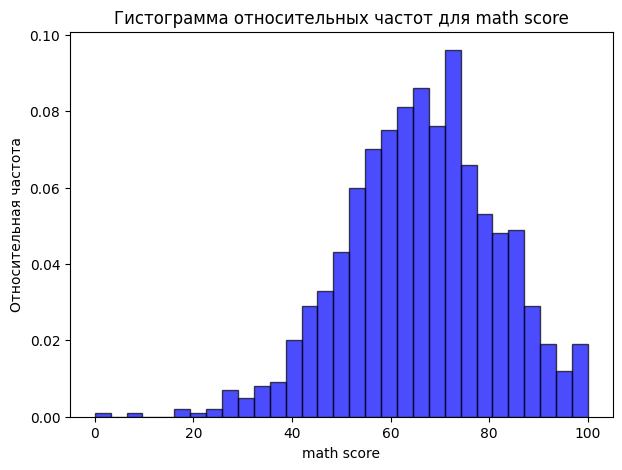

Закон распределения для reading score:
     Интервалы  Среднее значение  Частота  Относительная частота
0    17.0-19.7         18.338710        1                  0.001
1    19.7-22.4         21.016129        0                  0.000
2    22.4-25.0         23.693548        3                  0.003
3    25.0-27.7         26.370968        1                  0.001
4    27.7-30.4         29.048387        3                  0.003
5    30.4-33.1         31.725806        3                  0.003
6    33.1-35.7         34.403226        4                  0.004
7    35.7-38.4         37.080645        5                  0.005
8    38.4-41.1         39.758065       13                  0.013
9    41.1-43.8         42.435484       16                  0.016
10   43.8-46.5         45.112903       17                  0.017
11   46.5-49.1         47.790323       24                  0.024
12   49.1-51.8         50.467742       23                  0.023
13   51.8-54.5         53.145161       47          

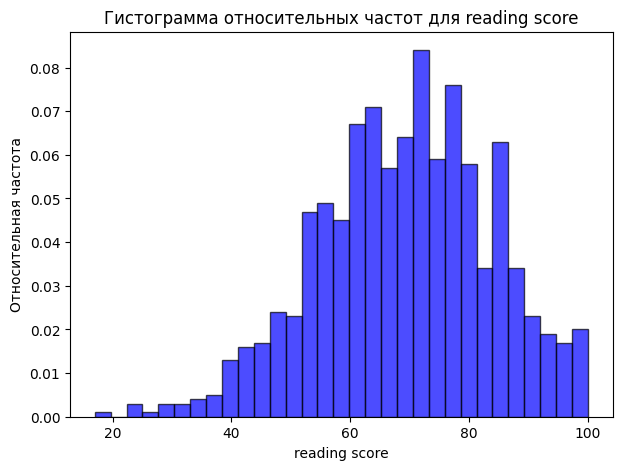

Закон распределения для writing score:
     Интервалы  Среднее значение  Частота  Относительная частота
0    10.0-12.9         11.451613        1                  0.001
1    12.9-15.8         14.354839        1                  0.001
2    15.8-18.7         17.258065        0                  0.000
3    18.7-21.6         20.161290        1                  0.001
4    21.6-24.5         23.064516        2                  0.002
5    24.5-27.4         25.967742        3                  0.003
6    27.4-30.3         28.870968        2                  0.002
7    30.3-33.2         31.774194        4                  0.004
8    33.2-36.1         34.677419        8                  0.008
9    36.1-39.0         37.580645       10                  0.010
10   39.0-41.9         40.483871       11                  0.011
11   41.9-44.8         43.387097       27                  0.027
12   44.8-47.7         46.290323       27                  0.027
13   47.7-50.6         49.193548       27          

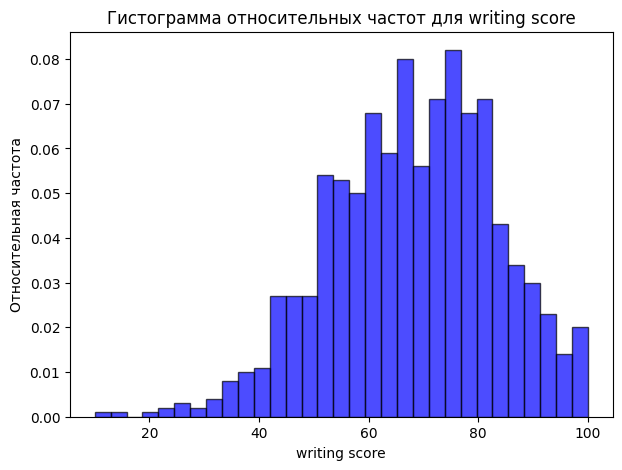

In [15]:
for column in continuous_columns:
    num_bins = int(np.sqrt(len(data)))
    freq, bins = np.histogram(data[column], bins=num_bins)
    relative_freq = freq / len(data)
    mid_points = [(bins[i] + bins[i+1]) / 2 for i in range(len(bins)-1)]

    print(f'Закон распределения для {column}:')
    distribution_table = pd.DataFrame({
        'Интервалы': [f'{bins[i]:.1f}-{bins[i+1]:.1f}' for i in range(len(bins)-1)],
        'Среднее значение': mid_points,
        'Частота': freq,
        'Относительная частота': relative_freq
    })
    print(distribution_table, '\n')

    plt.figure(figsize=(7, 5))
    plt.bar(mid_points, relative_freq, width=(bins[1] - bins[0]), alpha=0.7, color='b', edgecolor='black')
    plt.xlabel(column)
    plt.ylabel('Относительная частота')
    plt.title(f'Гистограмма относительных частот для {column}')
    plt.show()

# Вывод

In [14]:
strongest_group = mean_by_group.mean(axis=1).idxmax()
strongest_gender = mean_by_gender.mean(axis=1).idxmax()
strongest_course = mean_by_course.mean(axis=1).idxmax()
strongest_parent_edu = mean_by_parent_education.mean(axis=1).idxmax()
weakest_group = mean_by_group.mean(axis=1).idxmin()
weakest_parent_edu = mean_by_parent_education.mean(axis=1).idxmin()

print(f"Группа с наивысшими средними баллами: {strongest_group}")
print(f"Пол с наивысшими средними баллами: {strongest_gender}")
print(f"Подготовительные курсы влияют на результаты: {'yes' if strongest_course == 'completed' else 'no'}")
print(f"Уровень образования родителей, связанный с высокими баллами: {strongest_parent_edu}\n")

print(f"Группа с наименьшими средними баллами: {weakest_group}")
print(f"Уровень образования родителей, связанный с наименьшими баллами: {weakest_parent_edu}")

NameError: name 'mean_by_group' is not defined